In [325]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#data from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

plt.style.use('ggplot')
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing

In [326]:
minvals = []
for col in df.columns:
    minval = min(df[col].values)
    minvals.append(minval)
print(minvals)

[0, 0, 0, 0, 0, 0.0, 0.078, 21, 0]


Glucose, BloodPressure, SkinThickness, Insulin and BMI columns have an erroneous minimum value of zero

In [327]:
fixcols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in fixcols:
    df[col].replace(0, np.nan, inplace = True)

In [328]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [329]:
#separate features and labels
X = df.iloc[:, :-1] 
y = df.iloc[:, [-1]]

In [330]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.fillna(X_train.mean(), inplace = True)
X_test.fillna(X_train.mean(), inplace = True)
X.fillna(X_train.mean(), inplace = True)

C:\Users\lende\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [358]:
len(X_train)

537

In [303]:
X_train.iloc[234] #had NaN values for SkinThickness and Insulin

Pregnancies                   0.000000
Glucose                      57.000000
BloodPressure                60.000000
SkinThickness                28.647520
Insulin                     155.333333
BMI                          21.700000
DiabetesPedigreeFunction      0.735000
Age                          67.000000
Name: 537, dtype: float64

In [304]:
X_train.mean() #index 234 matches mean values for SkinThickness and Insulin

Pregnancies                   3.726257
Glucose                     121.984962
BloodPressure                72.241313
SkinThickness                28.647520
Insulin                     155.333333
BMI                          32.276128
DiabetesPedigreeFunction      0.469920
Age                          33.074488
dtype: float64

In [331]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) 
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)
rescaledX = scaler.transform(X)

#reshape target variable arrays from (0,1) arrays to (1,0) arrays
y_train, y_test, y = np.ravel(y_train), np.ravel(y_test), np.ravel(y)

for each default feature range $[a,b]$ , scaler maps each $x \in [a,b]$ to the target feature range ( in this case, $[0,1]$ )

i.e. scaler is given by the map $f: [a,b] \rightarrow [0,1] $ where

##  $f(x) = \frac{x-a}{b-a}$

# Further Exploratory Data Analysis

In [333]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.333333,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.333333,26.6,0.351,31
2,8,183.0,64.0,28.64752,155.333333,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [336]:
corr_mat = X.corr()
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127892,0.208561,0.078950,0.055812,0.021558,-0.033523,0.544341
Glucose,0.127892,1.000000,0.218420,0.191943,0.420176,0.231160,0.137042,0.266508
BloodPressure,0.208561,0.218420,1.000000,0.189630,0.072329,0.281214,-0.002608,0.324726
SkinThickness,0.078950,0.191943,0.189630,1.000000,0.158099,0.544844,0.104970,0.122023
Insulin,0.055812,0.420176,0.072329,0.158099,1.000000,0.166728,0.098844,0.136466
BMI,0.021558,0.231160,0.281214,0.544844,0.166728,1.000000,0.153443,0.025609
DiabetesPedigreeFunction,-0.033523,0.137042,-0.002608,0.104970,0.098844,0.153443,1.000000,0.033561
Age,0.544341,0.266508,0.324726,0.122023,0.136466,0.025609,0.033561,1.000000


In [350]:
maxcorr_vals = []
for i in range(len(corr_mat.index)):
    arr = corr_mat.iloc[i].values
    maxval = 0
    for j in range(len(arr)):
        if (j != i) & (abs(arr[j]) > abs(maxval)):
            maxval = arr[j]
    maxcorr_vals.append(maxval)

In [353]:
maxcorr_vals[0:4] #rest of list is redundant

[0.5443412284023388,
 0.4201761880700925,
 0.3247264546325452,
 0.5448444970964589]

Highest Correlations: (Pregnancy, Age), (Glucose, Insulin), (BloodPressure, Age), (SkinThickness, BMI)

# K-Nearest Neighbors (knn)

In [315]:
from sklearn.neighbors import KNeighborsClassifier

#k = 5

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(rescaledX_train, y_train)

ytest_pred = knn.predict(rescaledX_test)
ytrain_pred = knn.predict(rescaledX_train)

In [316]:
testing_matches = (y_test == ytest_pred)
training_matches = (y_train == ytrain_pred)

testing_accuracy = sum(testing_matches)/len(testing_matches)
training_accuracy = sum(training_matches)/len(training_matches)
print('Testing Accuracy: ', testing_accuracy)
print('Training Accuracy' ,training_accuracy)

Testing Accuracy:  0.70995670995671
Training Accuracy 0.8566108007448789


Testing accuracy:  0.70995670995671 (fit on training features and target and predict on test features)

Training accuracy 0.8566108007448789 (fit on training features and target and predict on training features)

values can also be acquired through ".score" method

In [380]:
#comparing different values of k

n = 50
krange = np.arange(1, n+1)
test_score = []
train_score = []

for k in krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(rescaledX_train, y_train)
    ytest_pred = knn.predict(rescaledX_test)
    ytrain_pred = knn.predict(rescaledX_train)
    
    test_score.append(knn.score(rescaledX_test, y_test))
    train_score.append(knn.score(rescaledX_train, y_train))

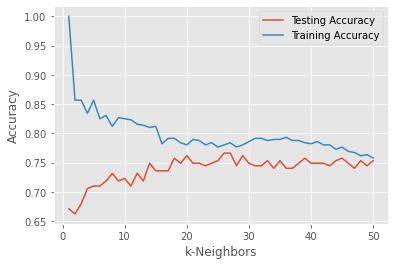

In [381]:
_ = plt.plot(krange, test_score, label = 'Testing Accuracy')
_ = plt.plot(krange, train_score, label = 'Training Accuracy')
plt.legend()
plt.xlabel('k-Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Further Comparisons using Grid Search Cross Validation

In [492]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,51)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 3)
knn_cv.fit(rescaledX_train, y_train)
knn_best = knn_cv.best_estimator_
knn_cv.best_score_

0.7821229050279329

## Do I have Diabetes?

In [474]:
cols = df.columns.values[:-1]
#15mm skin thickness, 66 mmHg Blood Pressure, 26 years old, 110 glucose, 108 Insulin, use average DPF
myfeatures = np.array([0, 110, 66, 15, 108, 24.3, 0.402839, 26])
myvals = dict(list(zip(cols, myfeatures)))
myvals_series = pd.Series(myvals)

In [487]:
maxvals = df.max().values[:-1]
minvals = df.min().values[:-1]

scaledvals = (myvals_series.values - minvals)/(maxvals - minvals)
diabetic_truthval = knn_best.predict(scaledvals.reshape(1,-1))[0]

print('Has Diabetes? (True or False): ',bool(diabetic_truthval))

Has Diabetes? (True or False):  False
